# Praktikum 2
## vorbereitende Aufgaben - Aufgabe 2
### 1.


In [69]:
# import libraries
import pandas as pd
import numpy as np
import scipy.signal as sci
import matplotlib.pyplot as plt
import Lab2Functions as ekg

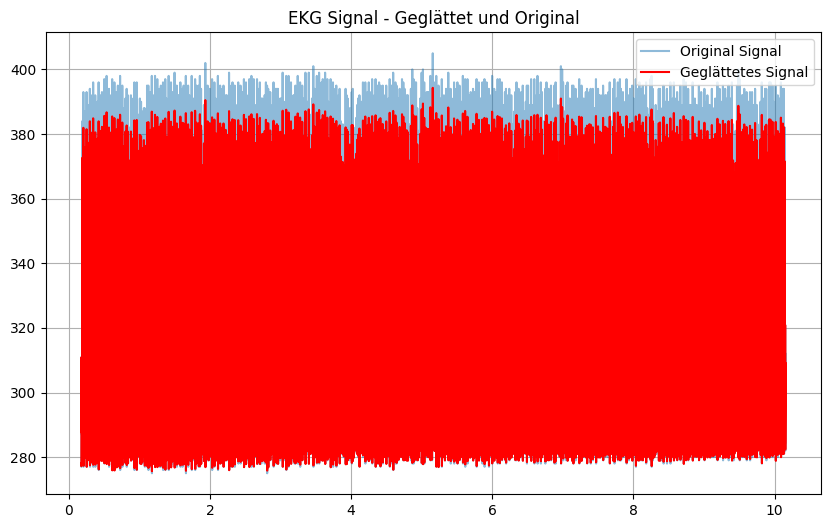

In [70]:
df = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
#df2 = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
#df3 = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
time_ms = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal - Geglättet und Original')
plt.legend()
plt.grid()
plt.show()



### 1a)

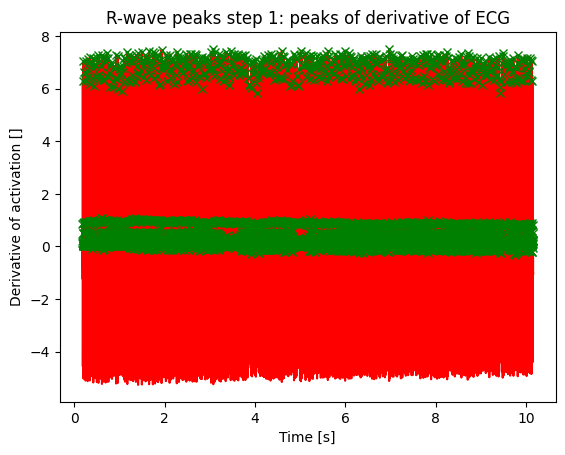

In [71]:
d_ecg, peaks_d_ecg = ekg.decg_peaks(ecg_filtered, time_ms)

### 1b)

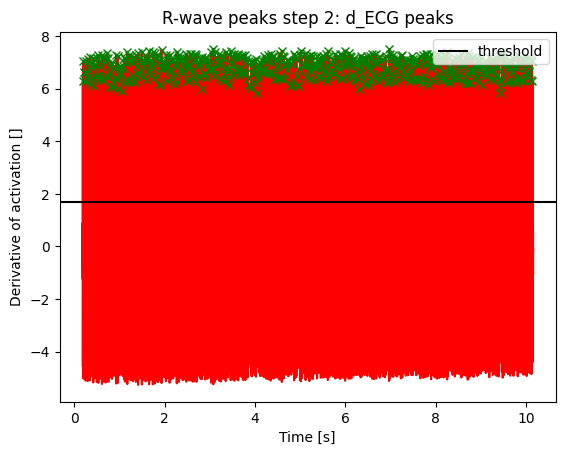

In [72]:
Rwave_peaks_d_ecg=ekg.d_ecg_peaks(d_ecg, peaks_d_ecg, time_ms, 0.4, 0.5)
#print(Rwave_peaks_d_ecg)    

### 1c)

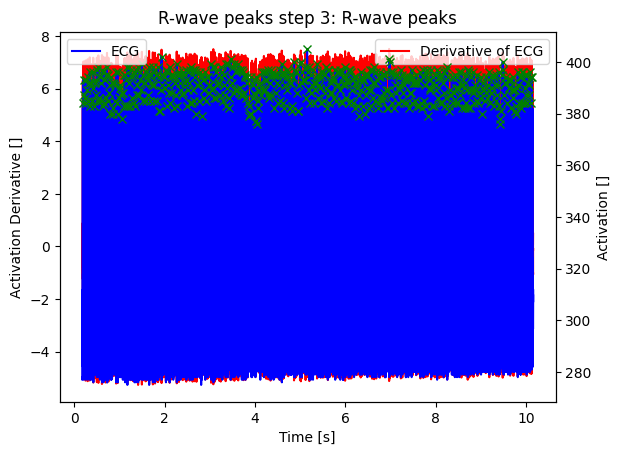

0       0.191533
1       0.206733
2       0.223183
3       0.237333
4       0.252200
         ...    
628    10.072583
629    10.088233
630    10.102183
631    10.116100
632    10.130417
Name: Millis, Length: 633, dtype: float64


In [73]:
Rwave_t = ekg.Rwave_peaks(ecg, d_ecg, Rwave_peaks_d_ecg, time_ms)
print(Rwave_t)

### 2.

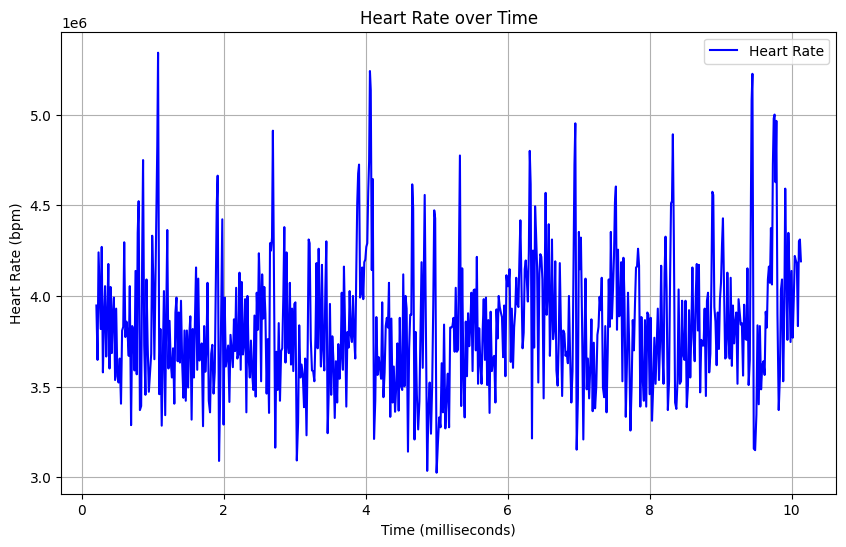

Heart Rate Variability (HRV): 373540.19961032964 bpm


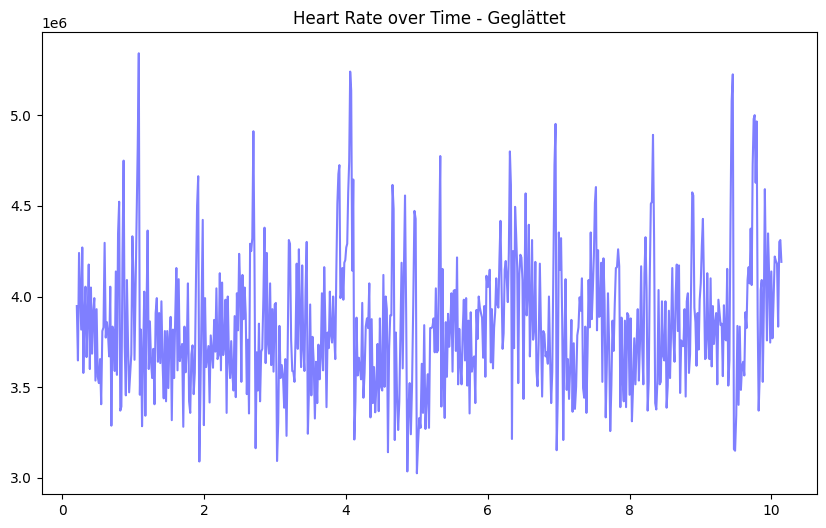

In [74]:
# Calculate the time differences between consecutive R-wave peaks
Rwave_intervals = np.diff(Rwave_t)

# Calculate the heart rate in beats per minute (bpm)
heart_rate = (60 / Rwave_intervals)*1000

# Create a new time series for the heart rate
exercise_hr = Rwave_t[1:]  # Exclude the first R-wave time as it has no preceding interval

# Plot the heart rate
plt.figure(figsize=(10, 6))
plt.plot(exercise_hr, heart_rate, label='Heart Rate', color='blue')
plt.title('Heart Rate over Time')
plt.xlabel('Time (milliseconds)')


plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid()
plt.show()

Wn=0.09
b2, a2=sci.butter(4, Wn, btype='low')
exercise_hr_filt=sci.filtfilt(b2, a2, exercise_hr)

plt.figure(figsize=(10, 6))
plt.plot(exercise_hr_filt, heart_rate, label='Heart Rate', color='blue', alpha=0.5)
plt.title('Heart Rate over Time - Geglättet')

# Calculate heart rate variability (HRV) as the standard deviation of the heart rate
hrv = np.std(heart_rate)
print(f'Heart Rate Variability (HRV): {hrv} bpm')



# Aufgaben Laborbericht
## Aufgabe 3

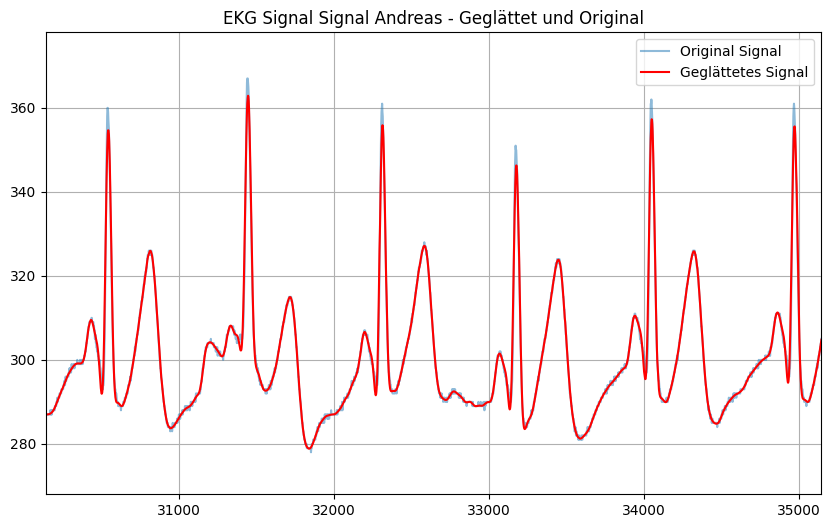

In [75]:
# Plot Ruhe Andreas
df = pd.read_csv('lab2code1_Ruhe_Andreas2.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
#time_minutes = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Andreas - Geglättet und Original')
plt.legend()
plt.grid()
# Display only 5 seconds of the plot
start_time = time_ms.iloc[0]
end_time = start_time + 5000  # 5 seconds later

plt.xlim(start_time, end_time)
plt.show()



In [76]:
# Ensure time_ms and ecg_filtered are defined
if 'time_ms' in globals() and 'ecg_filtered' in globals():
    # Peaks erkennen (z. B. für R-Spitzen im QRS-Komplex)
    distance = int(200 / (time_ms[1] - time_ms[0]))  # Mindestabstand zwischen Spitzen in Samples (ca. 200ms)
    r_peaks, _ = sci.find_peaks(ecg_filtered, distance=distance, height=np.mean(ecg_filtered) + np.std(ecg_filtered))

    # QRS-Komplex: Suche nach den Q- und S-Punkten um jede R-Spitze
    qrs_windows = []
    for peak in r_peaks:
        # Suche nach den Q- und S-Punkten in einem festen Zeitfenster um die R-Spitze
        window = int(100 / (time_ms[1] - time_ms[0]))  # 100ms vor und nach der R-Spitze
        q_idx = max(0, peak - window)
        s_idx = min(len(ecg_filtered), peak + window)
        qrs_windows.append((q_idx, s_idx))

    # Einfache Suche nach P- und T-Wellen basierend auf den QRS-Fenstern
    p_waves = [max(0, q - int(150 / (time_ms[1] - time_ms[0]))) for q, _ in qrs_windows]
    t_waves = [min(len(ecg_filtered) - 1, s + int(200 / (time_ms[1] - time_ms[0]))) for _, s in qrs_windows]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
    plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')

    # Schreibe Buchstaben an die jeweiligen Positionen
    for p in p_waves:
        plt.text(time_ms[p], ecg_filtered[p], 'P', color='blue', fontsize=10, fontweight='bold')
    for r in r_peaks:
        plt.text(time_ms[r], ecg_filtered[r], 'R', color='green', fontsize=10, fontweight='bold')
    for t in t_waves:
        plt.text(time_ms[t], ecg_filtered[t], 'T', color='purple', fontsize=10, fontweight='bold')

    plt.title('EKG Signal - Markierte P-, R- und T-Wellen')
    plt.legend()
    plt.grid()

    # Display only 5 seconds of the plot
    start_time = time_ms.iloc[0]
    end_time = start_time + 5000  # 5 seconds later
    plt.xlim(start_time, end_time)

    plt.show()
else:
    print("Variables 'time_ms' and 'ecg_filtered' are not defined.")

ValueError: Image size of 93303x528 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

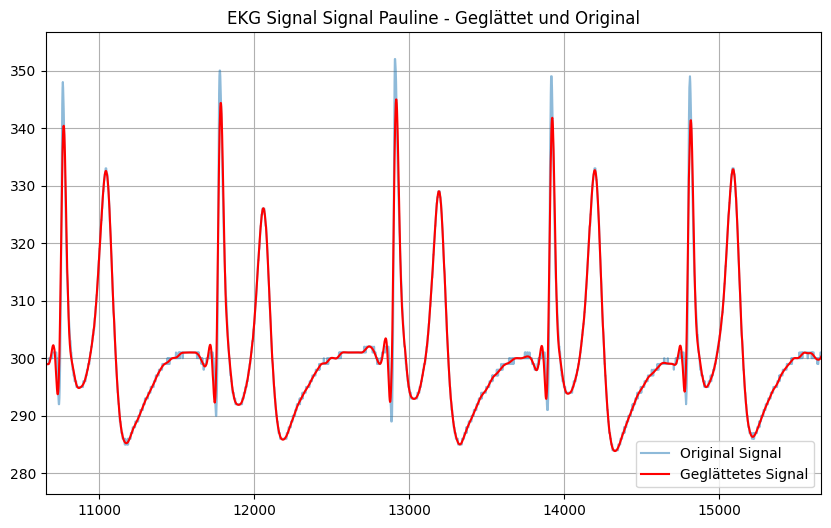

In [77]:
# Plot Ruhe Pauline
df = pd.read_csv('lab2code1_Ruhe_Pauline.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
#time_minutes = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Pauline - Geglättet und Original')
plt.legend()
plt.grid()
# Display only 5 seconds of the plot
start_time = time_ms.iloc[0]
end_time = start_time + 5000  # 5 seconds later

plt.xlim(start_time, end_time)
plt.show()



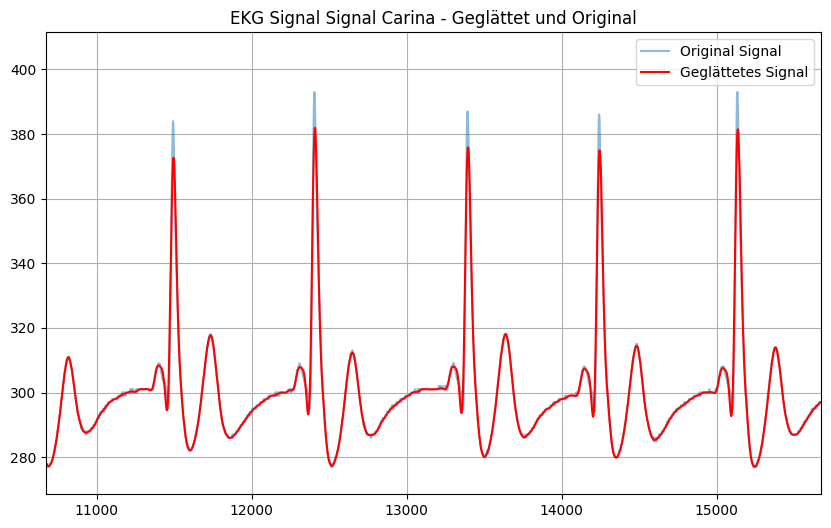

In [78]:
# Plot Ruhe Andreas
df = pd.read_csv('lab2code1_Ruhe_Carina.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
#time_minutes = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Signal Carina - Geglättet und Original')
plt.legend()
plt.grid()
# Display only 5 seconds of the plot
start_time = time_ms.iloc[0]
end_time = start_time + 5000  # 5 seconds later

plt.xlim(start_time, end_time)
plt.show()



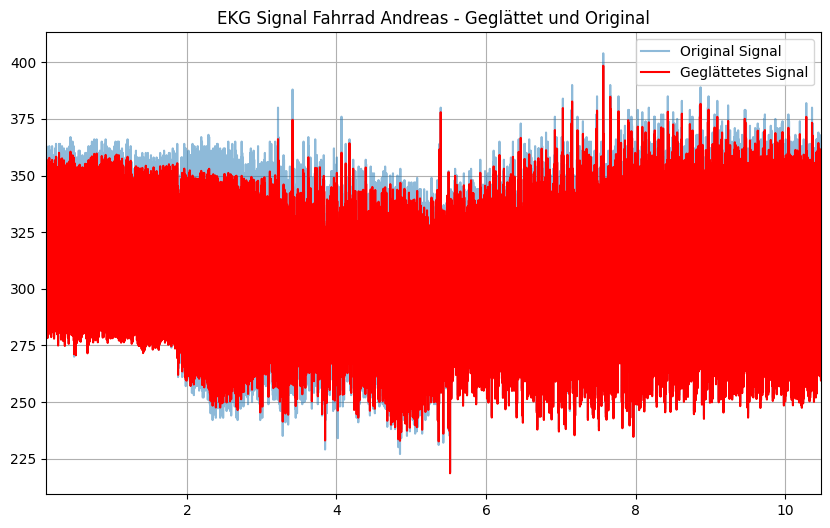

In [ ]:
# Plot Fahrrad Andreas
df = pd.read_csv('lab2code1_Fahrrad_Andreas.csv', sep = ';')
time_ms = df['Millis']
ecg=df['Value']
#time_ms = time_ms / (1000 * 60) 

Wn=0.08
b, a = sci.butter(4, Wn, 'low', analog=False)
ecg_filtered = sci.filtfilt(b, a, ecg) 

plt.figure(figsize=(10, 6))
plt.plot(time_ms, ecg, label='Original Signal', alpha=0.5)
plt.plot(time_ms, ecg_filtered, label='Geglättetes Signal', color='red')
plt.title('EKG Signal Fahrrad Andreas - Geglättet und Original')
plt.legend()
plt.grid()
# Display only 5 seconds of the plot
start_time = time_ms.iloc[0]
end_time = start_time + 5000  # 5 seconds later

plt.xlim(start_time, end_time)
plt.show()

